In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
Res=pd.read_csv('D:/Data set/resturent.csv')
Res.head(2)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39


In [45]:
# I am filling the null data by using mode method
Res.fillna(Res['choice_description'].mode()[0],inplace=True)

In [46]:
Res.head(2)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,[Diet Coke],$2.39
1,1,1,1,Izze,[Clementine],$3.39


In [47]:
#I just removed the $ symbol from the item price so that i can do calculations in that
Res['item_price'] = Res['item_price'].replace({'\$': ''},regex=True).astype(float)
Res.head(2)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,[Diet Coke],2.39
1,1,1,1,Izze,[Clementine],3.39


In [48]:
Res['Total']=Res['quantity']*Res['item_price']
Res.head(5)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price,Total
0,0,1,1,Chips and Fresh Tomato Salsa,[Diet Coke],2.39,2.39
1,1,1,1,Izze,[Clementine],3.39,3.39
2,2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,[Diet Coke],2.39,2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [55]:
Res['Total'].sum()

39237.02

# Now I am going to merge the rows according to order_ID and the total amount will be add as per the order ID's

In [50]:
Final_Bill = Res.groupby('order_id').agg({'Total': 'sum'}).reset_index()
Final_Bill.head(5)

,order_id,Total
0,1,11.56
1,2,33.96
2,3,12.67
3,4,21.00
4,5,13.70


## Total Sale of Restaurant

In [28]:
Final_Bill['Total'].sum()

39237.02

## The Person who's bill is highest

In [31]:
Final_Bill.sort_values(by='Total',ascending=False).head(1)

,order_id,Total
1442,1443,1074.24


In [53]:
#With this method I have merged the same items to find which item is in highest demand
Item_sale=Res.groupby('item_name')['Total'].sum().reset_index()
# This is the method to arange the complete column in ascending order as per their total amount
Item_sale.sort_values(by='Total', ascending=False).head(5)

,item_name,Total
17,Chicken Bowl,8044.63
18,Chicken Burrito,6387.06
39,Steak Burrito,4236.13
38,Steak Bowl,2479.81
25,Chips and Guacamole,2475.62


In [56]:
Item_sale_percent=((Item_sale['Total'])/(Item_sale['Total'].sum()))*100
Item_sale['Total_%']=Item_sale_percent

In [57]:
Item_sale.head(2)

,item_name,Total,Total_%
0,6 Pack Soft Drink,369.93,0.942809
1,Barbacoa Bowl,672.36,1.713586


In [60]:
Item_sale.sort_values(by='Total_%', ascending=False).head(5)

,item_name,Total,Total_%
17,Chicken Bowl,8044.63,20.502653
18,Chicken Burrito,6387.06,16.278148
39,Steak Burrito,4236.13,10.796258
38,Steak Bowl,2479.81,6.320077
25,Chips and Guacamole,2475.62,6.309399


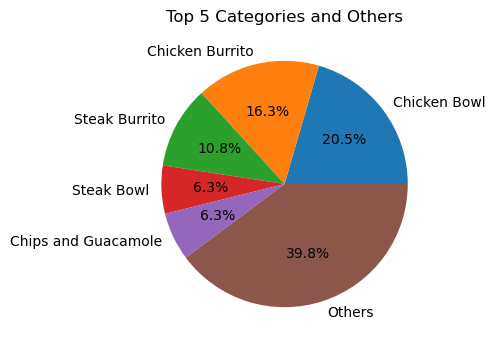

In [58]:
# Example data (replace this with your actual data)
categories = Item_sale['item_name']
values = Item_sale['Total_%']

# Sort the categories based on values
sorted_data1 = sorted(zip(categories, values), key=lambda x: x[1], reverse=True)

# Separate top 5 categories and sum up the rest
top_5_categories = [x[0] for x in sorted_data1[:5]]
top_5_values = [x[1] for x in sorted_data1[:5]]
other_value = sum(x[1] for x in sorted_data1[5:])

# Add 'Others' category with its value
top_5_categories.append('Others')
top_5_values.append(other_value)

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_5_values, labels=top_5_categories, autopct='%1.1f%%')
plt.title('Top 5 Categories and Others')
plt.show()


This restaurant identifies chicken bowl as their highest-selling item, they can implement various strategies to further grow their business:

1. **Quality Enhancement**: Ensure the chicken bowl's quality remains consistently high to meet customer expectations and encourage repeat purchases.

2. **Menu Diversification**: Introduce different varieties of chicken bowls, such as spicy, grilled, or vegetarian options, to cater to diverse customer preferences.

3. **Combo Deals**: Offer chicken bowls as part of combo meals along with sides like chips, salsa, or drinks to increase the average order value and customer satisfaction.

4. **Promotions and Specials**: Run promotional campaigns or specials focused on chicken bowls, such as limited-time discounts, loyalty rewards, or "bowl of the day" deals to attract more customers.

5. **Social Media Marketing**: Utilize social media platforms to showcase mouth-watering images and videos of chicken bowls, engage with customers, and promote special offers or events.

6. **Customer Feedback Incorporation**: Regularly gather feedback from customers about their chicken bowl experience and use it to make necessary adjustments or improvements to the recipe or presentation.

7. **Online Ordering and Delivery Services**: Provide convenient online ordering and delivery options for chicken bowls to reach a wider customer base, especially considering the growing trend of food delivery services.

8. **Catering Services**: Offer catering services for events, parties, or corporate meetings, featuring chicken bowls as one of the main menu items, to expand the restaurant's reach and generate additional revenue streams.

9. **Seasonal Variations**: Introduce seasonal variations of chicken bowls, incorporating fresh and seasonal ingredients or flavors to keep the menu innovative and appealing throughout the year.

10. **Cross-Promotions and Collaborations**: Partner with local businesses or organizations for cross-promotional opportunities, such as hosting bowl-themed events or collaborating with nearby businesses for joint marketing efforts.

By leveraging the popularity of chicken bowls and implementing these strategies effectively, the restaurant can capitalize on its success and drive further growth in its business.